### **Caso de Estudio: Modelo de Red Neuronal para la Predicción de Precios de Viviendas**
**Duracion:(2 Semanas)**  


---

## **1. Business Case Discovery**  
### **1.1 Contexto del Negocio**  
Eres parte de un equipo de análisis en una firma de inversión inmobiliaria. La empresa busca mejorar la precisión en la valoración de propiedades con el objetivo de maximizar la rentabilidad y minimizar riesgos. En este mercado, errores en la estimación de precios pueden resultar en pérdidas millonarias.

La empresa dispone de un dataset histórico

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

con las siguientes variables: 

- **Características de entrada:**  
  - `area`: Área total de la vivienda en pies cuadrados.  
  - `bedrooms`: Número de habitaciones.  
  - `bathrooms`: Número de baños.  
  - `stories`: Número de pisos.  
  - `mainroad`: Si la casa está en una calle principal (Sí/No).  
  - `guestroom`: Si tiene habitación de invitados (Sí/No).  
  - `basement`: Si cuenta con sótano (Sí/No).  
  - `hotwaterheating`: Si tiene calefacción de agua caliente (Sí/No).  
  - `airconditioning`: Si cuenta con aire acondicionado (Sí/No).  
  - `parking`: Número de plazas de estacionamiento.  
  - `prefarea`: Si está en una zona preferencial (Sí/No).  
  - `furnishingstatus`: Estado del mobiliario (Amueblado, Semiamueblado, No amueblado).  
- **Variable objetivo:**  
  - `price`: Precio de venta de la propiedad (variable continua a predecir).  

### **1.2 Objetivo del Proyecto**  
Desarrollar un modelo de redes neuronales para predecir los precios de las viviendas con una precisión superior a los métodos tradicionales como la regresión lineal.

### **1.3 Stakeholders y Requisitos**  
- **Inversores:** Buscan predicciones con un margen de error inferior al 10%.
- **Equipo Legal:** Exigen que el modelo sea interpretable para justificar decisiones en auditorías.
- **Equipo Técnico:** La implementación debe ser escalable y compatible con entornos de nube (AWS/GCP), utilizando Contenedores Docker.


### **1.4 Métricas de Éxito**  
- **Error cuadrático medio (RMSE):** Inferior al 10% del precio promedio de las viviendas.  
- **Coeficiente de determinación (R²):** Mayor a 0.60.  


### **1.5 Desafíos Anticipados**  
- **Multicolinealidad:** Variables como `area`, `bedrooms` y `bathrooms` pueden estar correlacionadas.
- **Distribuciones sesgadas:** Variables binarias y categóricas pueden necesitar codificación adecuada.
- **Sobreajuste:** La red neuronal puede memorizar datos en lugar de generalizar.

---

## **2. Data Processing**  
### **2.1 Carga y Exploración Inicial**  
El alumno deberá cargar el dataset, visualizar las primeras filas y explorar la distribución de los datos con histogramas y diagramas de caja. Se recomienda el uso de `pandas` y `matplotlib`.

**Pistas:**
- Identificar distribuciones con colas largas y valores atípicos.
- Revisar la presencia de valores nulos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_path = 'dataset_viviendas/Housing.csv'
df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
486,2870000,6000,2,1,1,yes,no,no,no,no,0,no,semi-furnished
263,4410000,3968,3,1,2,no,no,no,no,no,0,no,semi-furnished
79,6650000,6000,3,2,3,yes,yes,no,no,yes,0,no,furnished
316,4060000,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
164,5390000,6710,3,2,2,yes,yes,yes,no,no,1,yes,furnished
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
37,7980000,9000,4,2,4,yes,no,no,no,yes,2,no,furnished
190,5040000,7600,4,1,2,yes,no,no,no,yes,2,no,furnished
453,3150000,3069,2,1,1,yes,no,no,no,no,1,no,unfurnished
136,5740000,5400,4,2,2,yes,no,no,no,yes,2,no,unfurnished


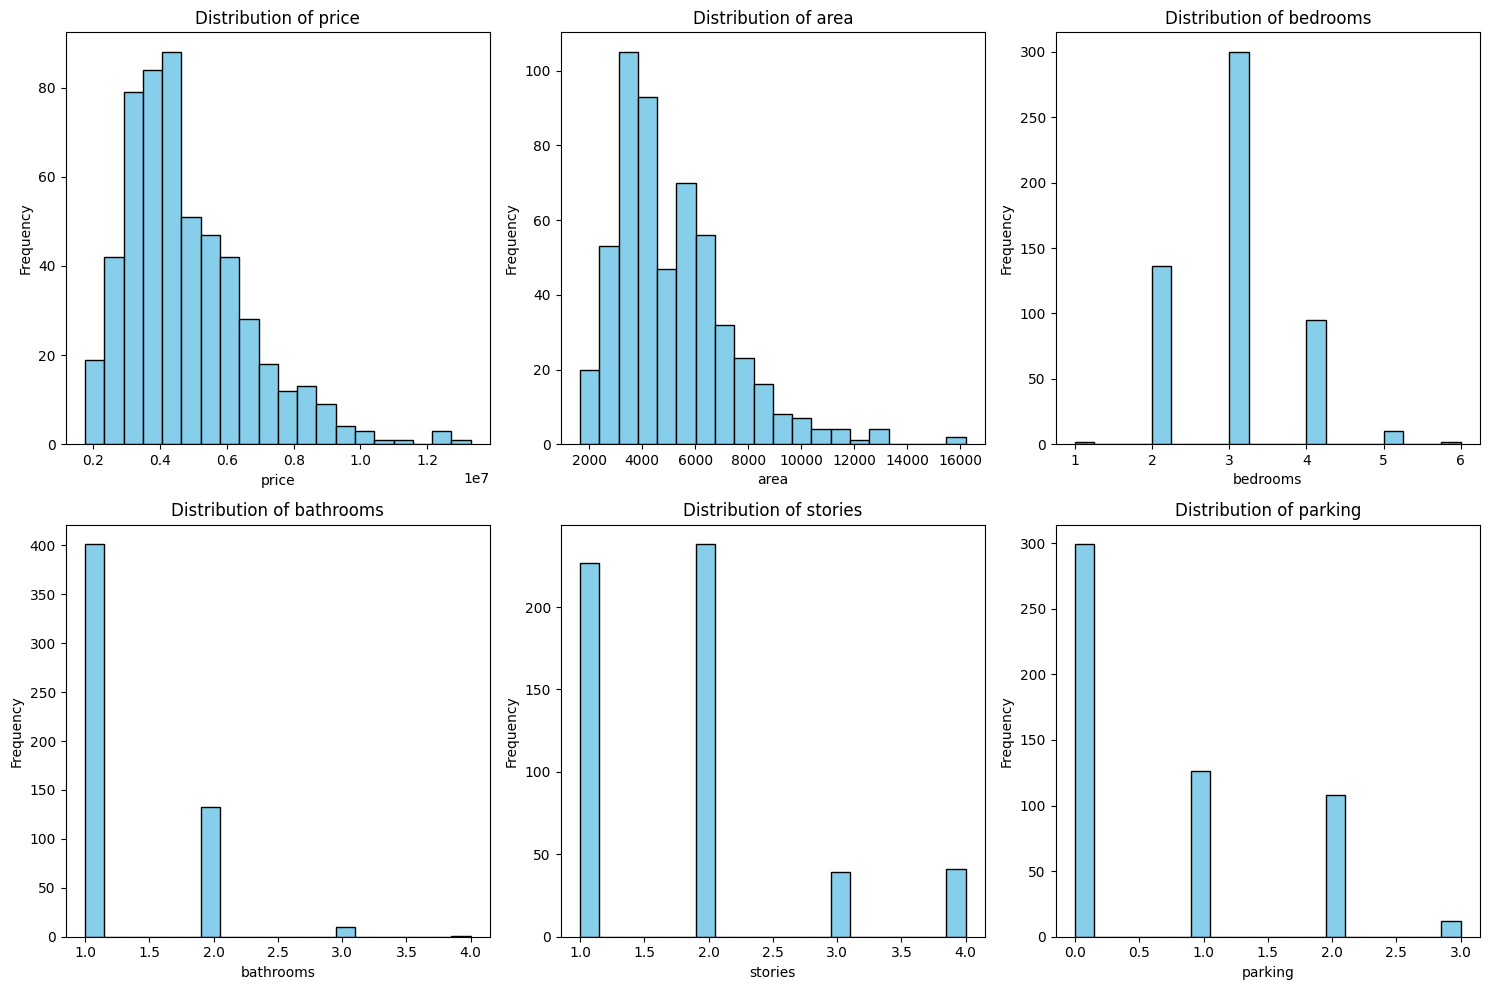

In [5]:
# Plotting distributions for numerical columns
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
# Displaying all null values in the dataset
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### **2.2 Preprocesamiento de Datos**  
- **Manejo de valores faltantes:** Si existen, imputarlos con la mediana o la moda según el tipo de variable.
- **Codificación de variables categóricas:** Convertir `mainroad`, `guestroom`, `basement`, etc., en valores numéricos.
- **Normalización:** Escalar las variables numéricas con `StandardScaler` o `MinMaxScaler`. 

In [7]:
# Dropping rows with null values
df.dropna(inplace=True)


In [8]:
# Transforming 'yes'/'no' values to 1/0 in relevant columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df[col] = df[col].replace({'yes': 1, 'no': 0})
df.sample(10)

C:\Users\sergi\AppData\Local\Temp\ipykernel_11504\2404211598.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
338,3885000,3780,2,1,2,1,1,1,0,0,0,0,semi-furnished
412,3430000,2610,3,1,2,1,0,1,0,0,0,1,unfurnished
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,semi-furnished
293,4200000,4410,2,1,1,0,0,0,0,0,1,0,unfurnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
98,6293000,6600,3,2,3,1,0,0,0,1,0,1,unfurnished
345,3850000,2015,3,1,2,1,0,1,0,0,0,1,semi-furnished
484,2870000,3040,2,1,1,0,0,0,0,0,0,0,unfurnished
534,2100000,3000,4,1,2,1,0,0,0,0,0,0,unfurnished
462,3080000,2160,3,1,2,0,0,1,0,0,0,0,semi-furnished


In [9]:
# Performing one-hot encoding for the 'furnishingstatus' column with values as 0/1
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnishing', drop_first=False).astype(int)
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
42,7700000,6480,3,2,4,1,0,0,0,1,2,0,0,0,1
83,6580000,6000,3,2,4,1,0,0,0,1,0,0,0,1,0
447,3150000,3500,2,1,1,0,0,1,0,0,0,0,0,1,0
116,6020000,6900,3,2,1,1,1,1,0,0,0,1,0,0,1
252,4515000,9860,3,1,1,1,0,0,0,0,0,0,0,1,0
440,3234000,3640,4,1,2,1,0,1,0,0,0,0,0,0,1
403,3500000,12944,3,1,1,1,0,0,0,0,0,0,0,0,1
349,3780000,4820,3,1,2,1,0,0,0,0,0,0,0,1,0
235,4620000,5680,3,1,2,1,1,0,0,1,1,0,0,1,0
497,2660000,3934,2,1,1,1,0,0,0,0,0,0,0,0,1


### **2.3 Análisis de Correlación**  
El alumno generará una matriz de correlación para analizar relaciones entre variables. Se sugiere utilizar `seaborn`.

**Pistas:**
- Evaluar qué variables tienen alta correlación con `price`.
- Considerar la eliminación de variables redundantes.

C:\Users\sergi\AppData\Local\Temp\ipykernel_11504\1623280121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='coolwarm')


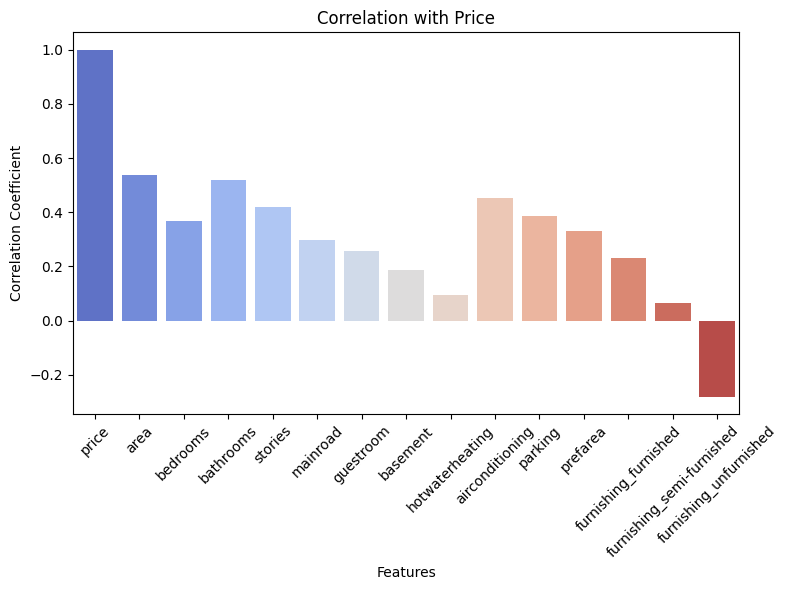

In [10]:
# Generating a correlation matrix based on the 'price' column
correlation_with_price = df.corr()['price']

# Plotting the correlation of other variables with 'price' using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='coolwarm')
plt.title('Correlation with Price')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

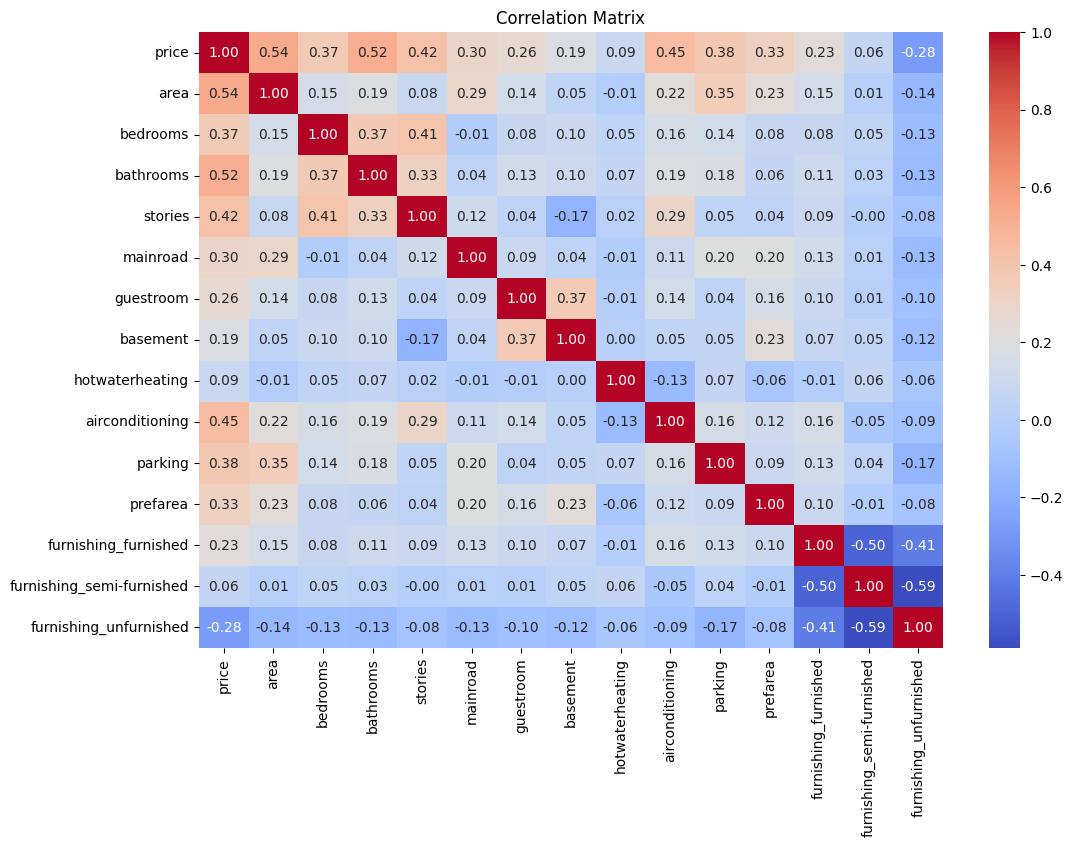

In [11]:
# Generating the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix')
plt.show()

### **2.4 División Train-Test**  
El alumno deberá dividir los datos en entrenamiento y prueba (80/20). Se recomienda usar `train_test_split` de `sklearn`.



In [21]:
from sklearn.model_selection import train_test_split
import logging

# Separating features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Splitting the dataset into training and testing sets (80/20 split)
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Splitting the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logging the sizes of the training and testing sets
logging.info(f"Training set size: {X_train.shape[0]} samples")
logging.info(f"Testing set size: {X_test.shape[0]} samples")

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

2025-03-20 11:00:44,666 - INFO - Training set size: 436 samples
2025-03-20 11:00:44,668 - INFO - Testing set size: 109 samples


Training set size: 436 samples
Testing set size: 109 samples


---
## **3. Model Planning**  
### **3.1 Definición del Problema**  
- **Tipo de Modelo:** Regresión con red neuronal.
- **Entrada:** 12 características preprocesadas.
- **Salida:** Predicción del precio.

### **3.2 Arquitectura de la Red**  
El alumno deberá diseñar una red neuronal con:
- **Capa de Entrada:** 12 neuronas (una por feature).
- **Capas Ocultas:** Dos capas densas con activación ReLU.
- **Capa de Salida:** 1 neurona con activación lineal.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir la arquitectura de la red neuronal
model = Sequential([
    Dense(12, input_dim=X_train.shape[1], activation='relu'),  # Capa de entrada con 12 neuronas
    Dense(64, activation='relu'),                             # Primera capa oculta con 64 neuronas
    Dense(32, activation='relu'),                             # Segunda capa oculta con 32 neuronas
    Dense(1, activation='linear')                             # Capa de salida con 1 neurona
])

# Compilar el modelo con la función de pérdida MSE y el optimizador Adam
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Resumen del modelo
model.summary()

c:\Users\sergi\Desktop\MasterAI\GenAI_Dev\repo\ia-generativa-desarrollo\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 12)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,125 (12.21 KB)

 Trainable params: 3,125 (12.21 KB)

 Non-trainable params: 0 (0.00 B)

### **3.3 Función de Pérdida y Optimizador**  
- **Loss Function:** Error cuadrático medio (MSE).
- **Optimizadores a comparar:** Adam y SGD con momentum.

In [14]:
from tensorflow.keras.optimizers import SGD

# Compilar el modelo con Adam
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("Modelo compilado con Adam")

# Compilar el modelo con SGD y momentum
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='mse', metrics=['mae'])
print("Modelo compilado con SGD y momentum")

Modelo compilado con Adam
Modelo compilado con SGD y momentum


### **3.4 Evaluación del Modelo**  
Se analizarán métricas como MAE, RMSE y R², y se usará validación cruzada (K-Fold con k=5).


In [24]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir K-Fold Cross Validation con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
rmse_scores = []
r2_scores = []

for train_index, val_index in kfold.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Entrenar el modelo con los datos de entrenamiento del fold actual
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=10, verbose=0)
    
    # Hacer predicciones en el conjunto de validación
    y_pred = model.predict(X_val_fold)
    
    # Calcular métricas
    mae = mean_absolute_error(y_val_fold, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
    r2 = r2_score(y_val_fold, y_pred)
    
    # Almacenar métricas en listas
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calcular el promedio de las métricas
print(f"MAE Promedio: {np.mean(mae_scores):.4f}")
print(f"RMSE Promedio: {np.mean(rmse_scores):.4f}")
print(f"R² Promedio: {np.mean(r2_scores):.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MAE Promedio: 1339484.0250
RMSE Promedio: 1806280.1972
R² Promedio: -0.0625


---

## **4. Model Building and Selection**  
### **4.1 Implementación en Keras**  
El alumno construirá el modelo usando `keras.Sequential()`.

### **4.2 Entrenamiento del Modelo**  
Entrenar la red con un número adecuado de épocas y un tamaño de batch óptimo, asegurando una validación efectiva para evitar sobreajuste.

Ejemplo: 100 épocas con `batch_size=32` y validación del 20%.

### **4.3 Experimentación de Hiperparámetros**  
- Probar distintas tasas de aprendizaje (`0.001`, `0.0001`).
- Comparar `batch_size=16` vs `64`.
- Aplicar regularización con `Dropout` o `L2`.

### **4.4 Evaluación en Conjunto de Test**  
El alumno comparará las métricas finales con las del conjunto de entrenamiento para verificar si hay sobreajuste.


---

## **5. Presentación de Resultados**  

### **5.1 Evaluación de Predicciones**  
El alumno deberá analizar la calidad de las predicciones utilizando gráficos de dispersión, líneas de tendencia y métricas clave como RMSE y R². Se recomienda interpretar visualmente cómo se alinean las predicciones con los valores reales y detectar posibles patrones de error. 

### **5.2 Análisis de Errores**  
Se identificarán las predicciones con errores significativos, especialmente aquellas con desviaciones superiores al 10% del precio real. El alumno deberá investigar si estos errores se deben a outliers, falta de representatividad en los datos de entrenamiento o limitaciones del modelo.  

### **5.3 Comparación con Baseline (OPCIONAL)**  
Para evaluar la efectividad del modelo, se compararán sus resultados con un modelo de regresión lineal tradicional. Se analizarán diferencias en RMSE, R² y la distribución de errores para justificar el uso de una red neuronal frente a métodos más simples.


---

## **6. Deployment**  
### **6.1 Serialización del Modelo**  
Se guardará el modelo en formato `.h5` o `.keras` para su reutilización.

### **6.2 Creación de API de Predicción**  
El alumno deberá implementar un endpoint con `Flask` que reciba datos y devuelva una predicción.


---

### **Conclusión**  
Este caso de estudio permite aplicar conceptos clave del ciclo de vida de un modelo de deep learning, combinando teoría y práctica. Se espera que el alumno documente cada decisión tomada en un informe técnico.